In [2]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
>>> import tensorflow as tf
>>> hello = tf.constant('Hello, TensorFlow!')
>>> sess = tf.Session()
>>> print(sess.run(hello))

b'Hello, TensorFlow!'


In [7]:
data_file = open("mnist_dataset/hi.txt","r")
data_list = data_file.readlines()
data_file.close()
print(data_list)

['12\n', '2\n', '3']


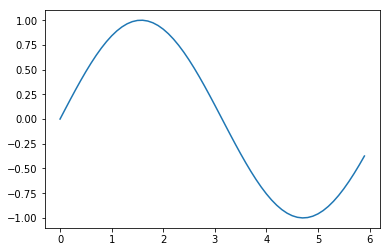

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0, 6, 0.1)
y=np.sin(x)

plt.plot(x, y)
plt.show()

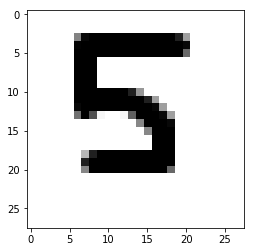

In [5]:
from matplotlib.image import imread

img = imread('./NeuralNetworkFirst/5.png')

plt.imshow(img)
plt.show()

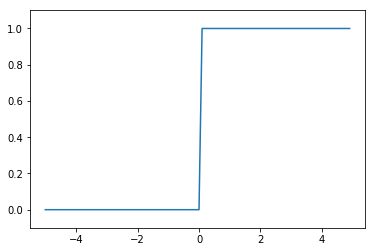

In [2]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [3]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [4]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

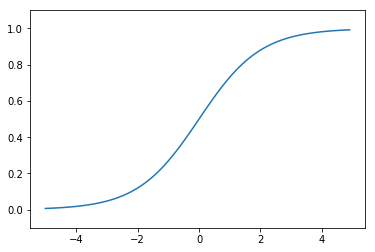

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [31]:
def sigmoid_cost(x):
    return -np.log(x)

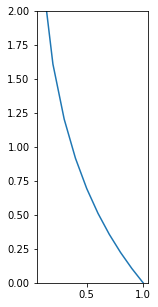

In [34]:
x = np.arange(0.1, 1.1, 0.1)
y = sigmoid_cost(x)
plt.figure(figsize=(2, 5))
plt.plot(x,y)
plt.ylim(0,2)
plt.show()

In [35]:
def sigmoid_cost_b(x):
    return -np.log(1-x)

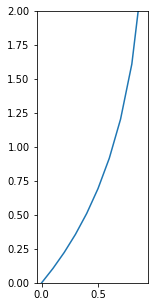

In [38]:
x = np.arange(0, 0.99, 0.1)
y = sigmoid_cost_b(x)
plt.figure(figsize=(2, 5))
plt.plot(x,y)
plt.ylim(0,2)
plt.show()

In [39]:
def relu(x):
    return np.maximum(0, x)

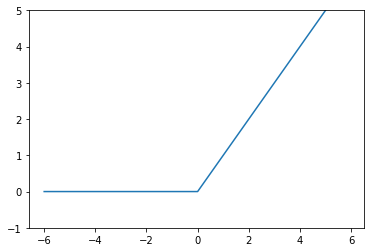

In [41]:
x = np.arange(-6, 6, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1,5)
plt.show()

In [42]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [43]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [44]:
np.sum(y)

1.0

In [6]:
nums = list(range(5))
# nums = [0.,1.,2.,3.,4.,5.]

print(nums)
print(nums[2:4])
print(nums[2:])
print(nums[:2])
print(nums[:])
print(nums[:-1])
nums[2:4] = [8,9]
print(nums)

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


In [1]:
def numerical_diff(f, x):
    h = 1e-4            # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [2]:
def function_tes(x):
    return 0.01*x**2 +0.1*x  # y=0.01x2 +0.1x

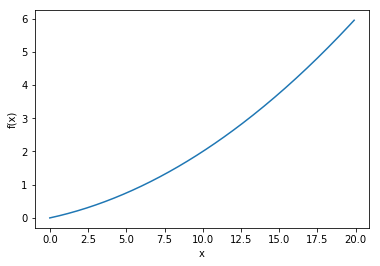

In [5]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_tes(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [7]:
numerical_diff(function_tes, 5)   #df(x)/dx = 0.02x +0.1

0.1999999999990898

In [8]:
numerical_diff(function_tes, 10)   #df(x)/dx = 0.02x +0.1

0.2999999999986347

In [9]:
def function_tmp1(x0):
    return x0*x0 + 4**2

In [10]:
numerical_diff(function_tmp1, 3)  #x0=3, x1=4

6.00000000000378

In [11]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [12]:
numerical_diff(function_tmp2, 4)  #x0=3, x1=4

7.999999999999119

In [13]:
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [16]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([ 6.,  8.])

In [17]:
numerical_gradient(function_2, np.array([0.0,2.0]))

array([ 0.,  4.])

In [18]:
numerical_gradient(function_2, np.array([3.0,0.0]))

array([ 6.,  0.])

In [19]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x